# clustering 

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

crime_df = pd.read_csv('USArrests.csv')
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


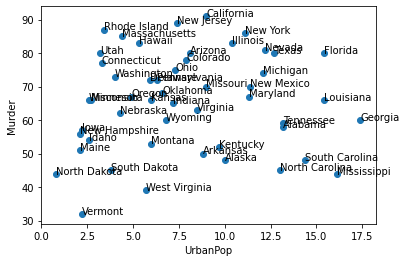

In [7]:
from sklearn.cluster import KMeans
X = crime_df.drop('State',axis=1)
y = crime_df['State']

plt.scatter(X['Murder'],X['UrbanPop'])

for i,txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))
plt.xlabel('UrbanPop')
plt.ylabel('Murder')
plt.show()

In [9]:
inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #average of squared distance from cluster center to the data points
    distortion = sum(np.min(cdist(X, model.cluster_centers_,
                                  'euclidean'),axis =1))/X.shape[0]
    
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method with Distortion')

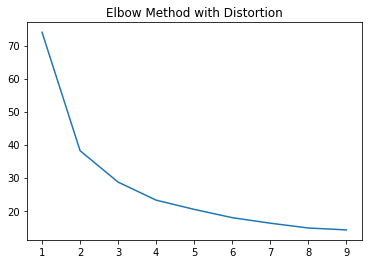

In [10]:
plt.plot(range(1,10),distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

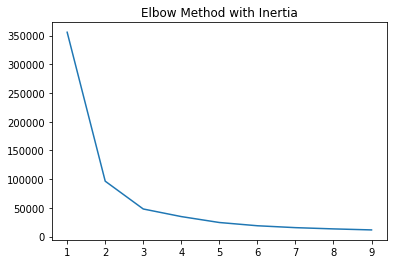

In [12]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

# Hierarchical

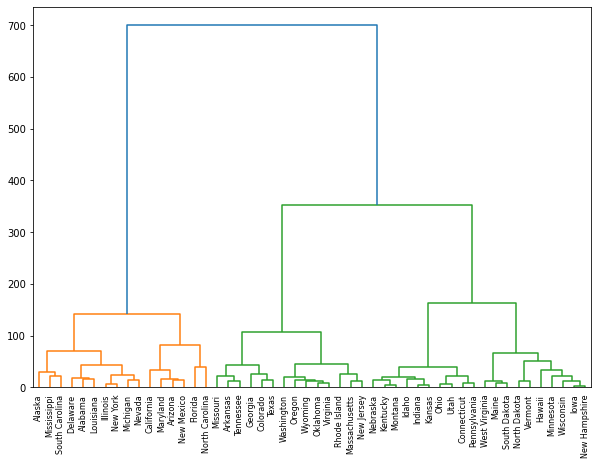

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X,'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels=list(y))
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

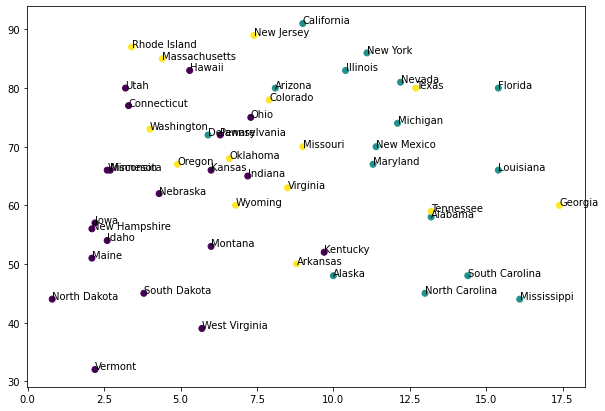

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X['Murder'],X['UrbanPop'],c=cluster.labels_)

for i,txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))
    
plt.show()

In [19]:
crime_df['cluster'] = cluster.labels_
crime_df.tail()

,State,Murder,Assault,UrbanPop,Rape,cluster
45,Virginia,8.5,156,63,20.7,2
46,Washington,4.0,145,73,26.2,2
47,West Virginia,5.7,81,39,9.3,0
48,Wisconsin,2.6,53,66,10.8,0
49,Wyoming,6.8,161,60,15.6,2


# Dimensionality Reduction

In [32]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

diabetes_df = pd.read_csv("../week_13/diabetes.csv")
#print(diabetes_df.head())

# Create feature and target arrays
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Logistic Regression
clr = LogisticRegression(random_state=42).fit(X_train, y_train)

#predict
y_predicted= clr.predict(X_test)
print(y_predicted)

# Print the accuracy
print("test accuracy: " + str(clr.score(X_test, y_test)))

# Print the accuracy
print("train accuracy: " + str(clr.score(X_train, y_train)))

[0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1
 0 0 0 1 0 1 1 1 0]
test accuracy: 0.7359307359307359
train accuracy: 0.7877094972067039


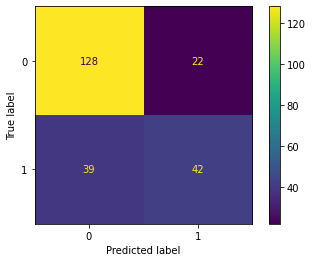

In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
plot_confusion_matrix(clr, X_test, y_test)

In [52]:
from sklearn.decomposition import TruncatedSVD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

svd = TruncatedSVD(n_components=7)

X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

clr = LogisticRegression(random_state=42).fit(X_train_svd, y_train)

# Print the accuracy
print("test accuracy: " + str(clr.score(X_test_svd, y_test)))

# Print the accuracy
print("train accuracy: " + str(clr.score(X_train_svd, y_train)))

test accuracy: 0.7056277056277056
train accuracy: 0.7877094972067039
